# 2 Structure 1 : Tas priorité min

## 2.7/2.8/2.9  

每个函数随Size变化的平均运行时间。从这个图表中，我们可以看到每个函数的性能如何随数据规模的增加而变化，

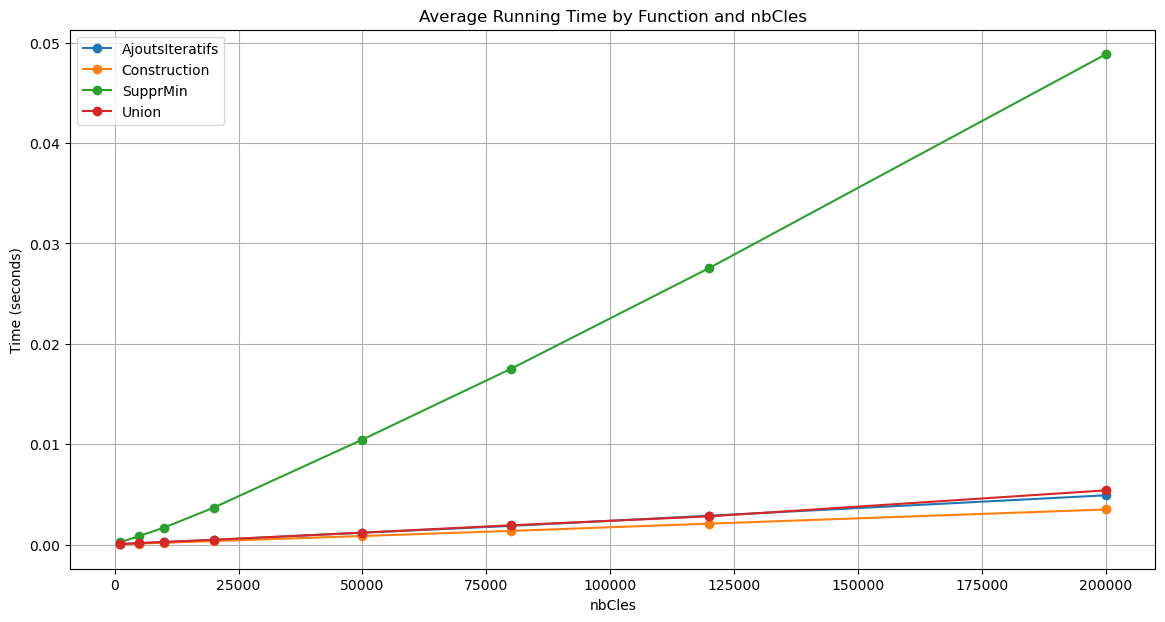

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is loaded into a DataFrame named 'df'
df = pd.read_csv('performance.csv')

# Group the data by 'Function' and 'Size' and calculate the mean time
df_mean = df.groupby(['Function', 'nbCles']).mean().reset_index()

# Now let's plot the mean time for each function
plt.figure(figsize=(14, 7))

# Plotting each function separately
for function in df_mean['Function'].unique():
    subset = df_mean[df_mean['Function'] == function]
    plt.plot(subset['nbCles'], subset['Time'], marker='o', label=function)

plt.xlabel('nbCles')
plt.ylabel('Time (seconds)')
plt.title('Average Running Time by Function and nbCles')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV数据
df = pd.read_csv('performance.csv')

# 过滤出AjoutsIteratifs函数的数据
df_ajout = df[df['Function'] == 'AjoutsIteratifs']

# 计算每个规模下的平均时间
df_ajout_mean = df_ajout.groupby('nbCles')['Time'].mean().reset_index()

# 拟合nlogn曲线
# 为了拟合nlogn，我们取时间除以log(n)的比例，应该和n成线性关系
df_ajout_mean['nlogn_fit'] = df_ajout_mean['Time'] / np.log(df_ajout_mean['nbCles'])

# 绘制原始数据点
plt.scatter(df_ajout_mean['nbCles'], df_ajout_mean['Time'], color='blue', label='Actual Time')

# 绘制拟合曲线
# 我们将拟合线性关系，因为我们已经除以了log(n)，所以纵轴是拟合值乘以log(size)
plt.plot(df_ajout_mean['nbCles'], df_ajout_mean['nlogn_fit']*np.log(df_ajout_mean['nbCles]), color='red', label='nlogn Fit')

# 设置图表标题和标签
plt.title('AjoutsIteratifs Time Complexity')
plt.xlabel('nbCles of dataset')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()


SyntaxError: invalid syntax (328444786.py, line 23)

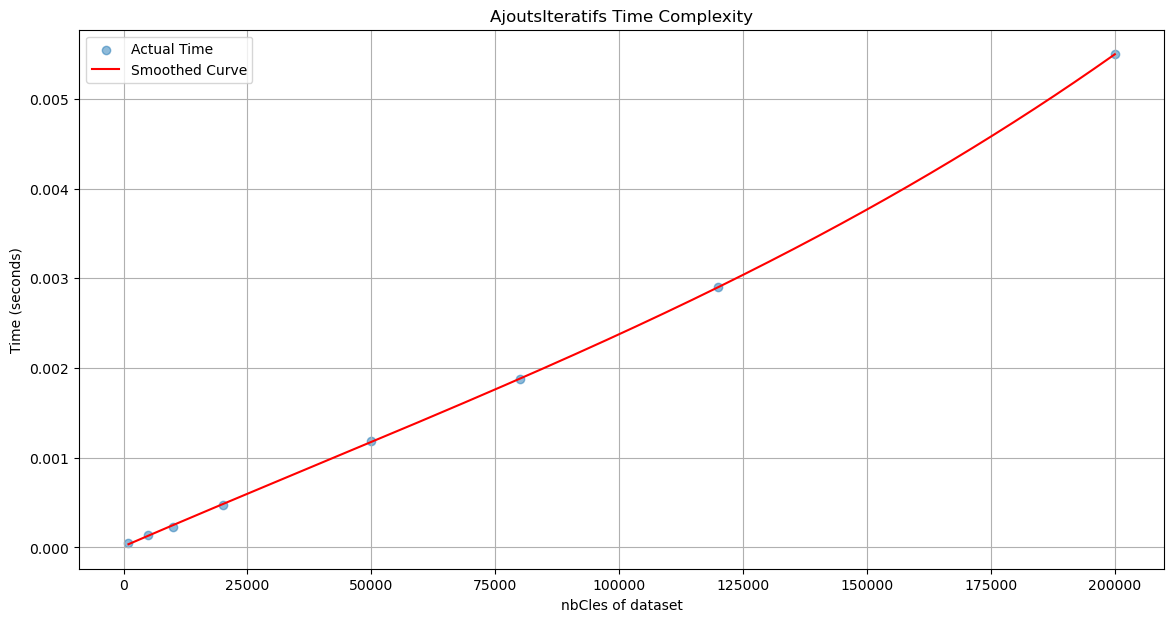

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you've already uploaded your 'performance.csv' file
# Read the CSV data into a DataFrame
df = pd.read_csv('performance.csv')

# Filter the data for the 'AjoutsIteratifs' function
df_ajout = df[df['Function'] == 'AjoutsIteratifs']

# Group the data by 'Size' and calculate the mean time for each size
df_ajout_mean = df_ajout.groupby('nbCles')['Time'].mean().reset_index()

# Now plot the mean time for each size
plt.figure(figsize=(14, 7))

# Plotting the actual data points
plt.scatter(df_ajout_mean['nbCles'], df_ajout_mean['Time'], marker='o', label='Actual Time', alpha=0.5)

# Fit a polynomial curve to the data
degree = 3  # You can adjust the degree of the polynomial
coefficients = np.polyfit(df_ajout_mean['nbCles'], df_ajout_mean['Time'], degree)
polynomial = np.poly1d(coefficients)

# Generate smoothed values for the curve
x_smooth = np.linspace(df_ajout_mean['nbCles'].min(), df_ajout_mean['nbCles'].max(), 1000)
y_smooth = polynomial(x_smooth)

# Plotting the smoothed curve
plt.plot(x_smooth, y_smooth, label='Smoothed Curve', color='red')

plt.xlabel('nbCles of dataset')
plt.ylabel('Time (seconds)')
plt.title('AjoutsIteratifs Time Complexity')
plt.legend()
plt.grid(True)
plt.show()
